Analisis y Simulacion de Estrategias en la Ruleta Clasica (un 0)


.


In [317]:
BLACK_NUMBERS = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
COLUMNS = ["3rd", "1st", "2nd"]
DOZENS = ["1st", "2nd", "3rd"]

In [318]:
from typing import Literal, List, Tuple, Union
from abc import abstractmethod
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
rng = np.random.default_rng(seed=42)

In [319]:
def spin_wheel(chunk: int = 500, include_zero: bool = True) -> np.ndarray[int]:
    return rng.integers(0 if include_zero else 1, 36, size=chunk, endpoint=True)

In [320]:
Single = int

Pair = Tuple[int, int]  # adjacent numbers, horizontally or vertically
Quad = Tuple[int, int, int, int]  # 4 numbers in a square

Column = Literal["1st", "2nd", "3rd"]
Dozen = Literal["1st", "2nd", "3rd"]

EvenOdd = Literal["even", "odd"]
RedBlack = Literal["red", "black"]
HighLow = Literal["high", "low"]  # 1-18, 19-36

bet_type = Union[Single, Pair, Quad, Column, Dozen, EvenOdd, RedBlack, HighLow]

In [321]:
class Bet:
    def __init__(self, bet: bet_type, amount: int):
        self.bet = bet
        self.amount = amount

    def __repr__(self):
        return f"({self.bet}, {self.amount})"

    def __str__(self):
        return self.__repr__()

    @abstractmethod
    def evaluate():
        pass


class SingleBet(Bet):
    def __init__(self, number: int, amount: int):
        assert 0 <= number <= 36, "Number must be between 0 and 36!"
        super().__init__(number, amount)

    def evaluate(self, spin: int) -> int:
        return (self.bet == spin) * self.amount * 36


class ColumnBet(Bet):
    def __init__(self, column: Column, amount: int):
        super().__init__(column, amount)

    def evaluate(self, spin: int) -> int:
        return (
            (
                (self.bet == "1st" and spin % 3 == 1)
                or (self.bet == "2nd" and spin % 3 == 2)
                or (self.bet == "3rd" and spin % 3 == 0)
            )
            * self.amount
            * 3
        )


class DozenBet(Bet):
    def __init__(self, dozen: Dozen, amount: int):
        super().__init__(dozen, amount)

    def evaluate(self, spin: int) -> int:
        return (
            (
                (self.bet == "1st" and spin < 13)
                or (self.bet == "2nd" and 13 <= spin < 25)
                or (self.bet == "3rd" and 25 <= spin)
            )
            * self.amount
            * 3
        )


class EvenOddBet(Bet):
    def __init__(self, even_odd: EvenOdd, amount: int):
        super().__init__(even_odd, amount)

    def evaluate(self, spin: int) -> int:
        return (
            (
                (self.bet == "even" and spin % 2 == 0)
                or (self.bet == "odd" and spin % 2 == 1)
            )
            * self.amount
            * 2
        )


class RedBlackBet(Bet):
    def __init__(self, red_black: RedBlack, amount: int):
        super().__init__(red_black, amount)

    def evaluate(self, spin: int) -> int:
        return (
            (
                (self.bet == "red" and spin not in BLACK_NUMBERS)
                or (self.bet == "black" and spin in BLACK_NUMBERS)
            )
            * self.amount
            * 2
        )


class HighLowBet(Bet):
    def __init__(self, high_low: HighLow, amount: int):
        super().__init__(high_low, amount)

    def evaluate(self, spin: int) -> int:
        return (
            ((self.bet == "high" and spin > 18) or (self.bet == "low" and spin <= 18))
            * self.amount
            * 2
        )


class PairBet(Bet):
    def __init__(self, pair: Pair, amount: int):
        for p in pair:
            assert 0 <= p <= 36, "Numbers must be between 0 and 36"
        super().__init__(pair, amount)

    def evaluate(self, spin: int) -> int:
        return (any(bet == spin for bet in self.bet)) * self.amount * 18


class QuadBet(Bet):
    def __init__(self, quad: Quad, amount: int):
        for q in quad:
            assert 0 <= q <= 36, "Numbers must be between 0 and 36"
        super().__init__(quad, amount)

    def evaluate(self, spin: int) -> int:
        return (any(bet == spin for bet in self.bet)) * self.amount * 9

In [322]:
def quads(number: int) -> List[Quad]:
    column = COLUMNS[number % 3]  # 1 is 1st, 2 is 2nd, 0 is 3rd
    if column == "1st":
        if number == 1:
            quads = [(1, 2, 4, 5)]
        elif number == 34:
            quads = [(31, 32, 34, 35)]
        else:
            quads = [
                (
                    number - 3,
                    number - 2,
                    number,
                    number + 1,
                ),
                (
                    number,
                    number + 1,
                    number + 3,
                    number + 4,
                ),
            ]
    elif column == "2nd":
        if number == 2:
            quads = [(1, 2, 4, 5), (2, 3, 5, 6)]
        elif number == 35:
            quads = [(31, 32, 34, 35), (32, 33, 35, 36)]
        else:
            quads = [
                (
                    number - (-1) * 4,
                    number - (-1) * 3,
                    number,
                    number - (-1) * 1,
                ),
                (
                    number - (-1) * 1,
                    number,
                    number + (-1) * 2,
                    number + (-1) * 3,
                ),
                (
                    number,
                    number + 1,
                    number + 3,
                    number + 4,
                ),
                (
                    number - 3,
                    number - 2,
                    number,
                    number + 1,
                ),
            ]
    elif column == "3rd":
        if number == 3:
            quads = [(2, 3, 5, 6)]
        elif number == 36:
            quads = [(32, 33, 35, 36)]
        else:
            quads = [
                (
                    number - 4,
                    number - 3,
                    number - 1,
                    number,
                ),
                (
                    number - 1,
                    number,
                    number + 2,
                    number + 3,
                ),
            ]
    return quads

In [323]:
def pairs(number: int) -> List[Pair]:
    column = COLUMNS[number % 3]  # 1 is 1st, 2 is 2nd, 0 is 3rd
    # horizontal pairs
    if column == "2nd":
        pairs = [
            (number, number - 1),
            (number, number + 1),
        ]
    elif column == "1st":
        pairs = [
            (number, number + 1),
        ]
    elif column == "3rd":
        pairs = [
            (number, number - 1),
        ]
    # vertical pairs
    if number in [1, 2, 3]:
        pairs.append((number, number + 3))
    elif number in [34, 35, 36]:
        pairs.append((number, number - 3))
    else:
        pairs.extend(
            [
                (number, number - 3),
                (number, number + 3),
            ]
        )
    return pairs

In [324]:
class BetStrategy:
    def __init__(self) -> None:
        pass

    @abstractmethod
    def make_bet(self) -> List[Bet]:
        pass

In [325]:
class MyStrategy(BetStrategy):
    def __init__(
        self, target_number: int = None, initial_balance: int = 1000, blind: int = 1
    ) -> None:
        if target_number is None:
            target_number = rng.integers(0, 36, size=1, endpoint=True)
        self.target_number = target_number
        self.balance = initial_balance
        self.blind = blind

    def make_bet(self) -> List[Bet]:
        """
        bet for the target_number and all the related bets that include the target_number
        i.e. if target_number is 33 bet for:
        * 33
        * 33, 32 pair
        * 33, 36 pair
        * 33, 30 pair
        * 32, 33, 35, 36 quad
        * 29, 30, 32, 33 quad
        * 3rd dozen
        * 3rd column
        * black
        * odd
        * high
        """
        bets: List[Bet] = [
            SingleBet(self.target_number, self.blind),
            ColumnBet(COLUMNS[self.target_number % 3], self.blind),
            DozenBet(DOZENS[int(np.ceil(self.target_number / 12) - 1)], self.blind),
            RedBlackBet(
                "black" if self.target_number in BLACK_NUMBERS else "red", self.blind
            ),
            EvenOddBet("odd" if self.target_number % 2 else "even", self.blind),
            HighLowBet("high" if self.target_number >= 19 else "low", self.blind),
        ]
        bets.extend([PairBet(pair, self.blind) for pair in pairs(self.target_number)])
        bets.extend([QuadBet(quad, self.blind) for quad in quads(self.target_number)])

        return bets

![Roulette](./roulette.webp)


In [326]:
strat = MyStrategy(target_number=24)
bets = strat.make_bet()
for bet in bets:
    print(f"{bet}, won {bet.evaluate(33)}")

(24, 1), won 0
(3rd, 1), won 3
(2nd, 1), won 0
(black, 1), won 2
(even, 1), won 0
(high, 1), won 2
((24, 23), 1), won 0
((24, 21), 1), won 0
((24, 27), 1), won 0
((20, 21, 23, 24), 1), won 0
((23, 24, 26, 27), 1), won 0


In [327]:
def simulate(strat=None, iterations=50, spins=None):
    data = {
        "balance_history": [],
        "prize_history": [],
        "frequencies": {},
        "winnings": {},
        "initial_balance": strat.balance,
        "bets": [],
        "spins": spin_wheel(chunk=iterations) if spins is None else spins,
    }

    for outcome in data["spins"]:
        if strat.balance <= 0:
            print("Busted!")
            break

        bet = strat.make_bet()
        data["bets"].append(bet)
        if not bet:
            print("No bets placed")
            continue

        spin_earnings = 0
        for play in bet:
            spin_earnings -= play.amount
            win = play.evaluate(outcome)
            spin_earnings += win

            if win > 0:
                data["frequencies"][type(play)] = (
                    data["frequencies"].get(type(play), 0) + 1
                )
                data["winnings"][type(play)] = (
                    data["winnings"].get(type(play), 0) + win - play.amount
                )

        data["prize_history"].append(spin_earnings)
        strat.balance += spin_earnings
        data["balance_history"].append(strat.balance)

    return data

In [328]:
a = [1, 2, 3, -2, -3, 0, 1, -2, -1, -4, 0]


def longest_run(a: List[int], predicate: callable) -> Tuple[List[int], int, int]:
    current_run = ([], 0, 0)  # run, length, sum
    max_run = ([], 0, 0)
    for num in a:
        if predicate(num):
            current_run = (
                current_run[0] + [num],
                current_run[1] + 1,
                current_run[2] + num,
            )

            if current_run[1] > max_run[1]:
                max_run = current_run
        else:
            current_run = ([], 0, 0)
    return max_run


print(longest_run(a, lambda x: x < 0))


custom = "=" * 10


def delimiter(word: str) -> str:
    return f"{custom} {word} {custom}"

([-2, -1, -4], 3, -7)


In [329]:
def simulation_report(data):
    iterations = len(data["spins"])
    print(delimiter("Summary"))
    print(f"Initial balance: {data["initial_balance"]}")
    print(f"Final balance: {data["balance_history"][-1]}")
    print(f"Total earnings: {data["balance_history"][-1] - data["initial_balance"]}")
    print(f"Total spins: {iterations}")

    print(delimiter("Bets Frequencies"))
    for name, count in data["frequencies"].items():
        print(f"{name.__name__}: {count} ~ {count/iterations:.2%}")

    print(delimiter("Bets Earnings"))
    for name, earnings in data["winnings"].items():
        print(f"{name.__name__}: {earnings}")

    print(delimiter("Additional"))
    negative_runs = len(
        [p for p in data["prize_history"] if p < 0]
    )  # where we lost money (including winning less than we bet)
    print(
        f"Negative runs: {negative_runs} in {iterations} ~ {negative_runs/iterations:.2%}"
    )
    avg_prize = sum(data["prize_history"]) / iterations
    print(f"Average earning per spin: {avg_prize:.2f}")
    print(
        f"Avg bet per spin: {sum([sum([b.amount for b in bet]) for bet in data["bets"]]) / iterations:.2f}"
    )

    max_idx = max(enumerate(data["prize_history"]), key=lambda x: x[1])[0]
    min_idx = min(enumerate(data["prize_history"]), key=lambda x: x[1])[0]
    print(
        f"Max prize: {data["prize_history"][max_idx]}, {data["bets"][max_idx]}, {data["spins"][max_idx]}"
    )
    print(
        f"Max loss: {data["prize_history"][min_idx]}, {data["bets"][min_idx]}",
        data["spins"][min_idx],
    )

    # longest negative run
    longest_negative_run = longest_run(data["prize_history"], lambda x: x < 0)
    print(
        f"Longest negative run: {longest_negative_run[1]} spins, losses: {longest_negative_run[2]}"
    )
    # longest win streak
    longest_win_run = longest_run(data["prize_history"], lambda x: x > 0)
    print(
        f"Longest win streak: {longest_win_run[1]} spins, earnings: {longest_win_run[2]}"
    )
    print(f"Zeros:, {len([p for p in data["spins"] if p == 0])}")

    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    plt.suptitle("Roulette Simulation for Strategy")
    ax[0].plot(data["balance_history"], color="black")
    ax[0].set_title("Balance")
    ax[1].plot(data["prize_history"], color="red")
    ax[1].set_title("Prize")
    plt.show()

========== Summary ==========
Initial balance: 5000
Final balance: 4940
Total earnings: -60
Total spins: 50
========== Bets Frequencies ==========
ColumnBet: 14 ~ 28.00%
EvenOddBet: 20 ~ 40.00%
DozenBet: 21 ~ 42.00%
RedBlackBet: 24 ~ 48.00%
HighLowBet: 27 ~ 54.00%
PairBet: 7 ~ 14.00%
QuadBet: 9 ~ 18.00%
SingleBet: 1 ~ 2.00%
========== Bets Earnings ==========
ColumnBet: 28
EvenOddBet: 20
DozenBet: 42
RedBlackBet: 24
HighLowBet: 27
PairBet: 119
QuadBet: 72
SingleBet: 35
========== Additional ==========
Negative runs: 43 in 50 ~ 86.00%
Average earning per spin: -1.20
Avg bet per spin: 11.00
Max prize: 109, [(33, 1), (3rd, 1), (3rd, 1), (black, 1), (odd, 1), (high, 1), ((33, 32), 1), ((33, 30), 1), ((33, 36), 1), ((29, 30, 32, 33), 1), ((32, 33, 35, 36), 1)], 33
Max loss: -11, [(33, 1), (3rd, 1), (3rd, 1), (black, 1), (odd, 1), (high, 1), ((33, 32), 1), ((33, 30), 1), ((33, 36), 1), ((29, 30, 32, 33), 1), ((32, 33, 35, 36), 1)] 16
Longest negative run: 11 spins, losses: -70
Longest win st

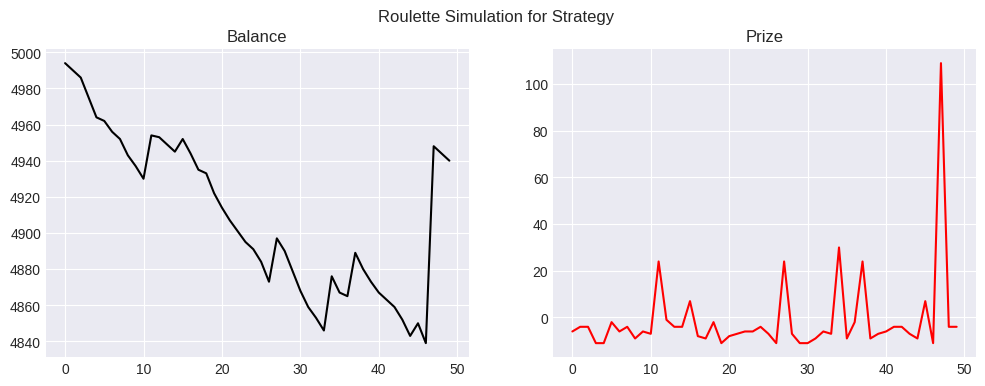

In [330]:
straty = MyStrategy(target_number=33, initial_balance=5000)
results = simulate(strat=straty, iterations=50)
simulation_report(results)

In [331]:
class MyStrategyV2(BetStrategy):
    def __init__(
        self, target_number: int = None, initial_balance: int = 1000, blind: int = 1
    ) -> None:
        if target_number is None:
            target_number = rng.integers(0, 36, size=1, endpoint=True)
        self.target_number = target_number
        self.balance = initial_balance
        self.blind = blind

    def make_bet(self) -> List[Bet]:
        bets: List[Bet] = [
            SingleBet(self.target_number, self.blind),
            ColumnBet(COLUMNS[self.target_number % 3], self.blind * 12),
            DozenBet(
                DOZENS[int(np.ceil(self.target_number / 12) - 1)], self.blind * 12
            ),
            RedBlackBet(
                "black" if self.target_number in BLACK_NUMBERS else "red",
                self.blind * 18,
            ),
            EvenOddBet("odd" if self.target_number % 2 else "even", self.blind * 18),
            HighLowBet("high" if self.target_number >= 19 else "low", self.blind * 18),
        ]
        bets.extend(
            [PairBet(pair, self.blind * 2) for pair in pairs(self.target_number)]
        )
        bets.extend(
            [QuadBet(quad, self.blind * 4) for quad in quads(self.target_number)]
        )

        return bets

========== Summary ==========
Initial balance: 5000
Final balance: 4922
Total earnings: -78
Total spins: 50
========== Bets Frequencies ==========
DozenBet: 18 ~ 36.00%
RedBlackBet: 25 ~ 50.00%
HighLowBet: 23 ~ 46.00%
EvenOddBet: 30 ~ 60.00%
ColumnBet: 12 ~ 24.00%
QuadBet: 9 ~ 18.00%
SingleBet: 2 ~ 4.00%
PairBet: 8 ~ 16.00%
========== Bets Earnings ==========
DozenBet: 432
RedBlackBet: 450
HighLowBet: 414
EvenOddBet: 540
ColumnBet: 288
QuadBet: 288
SingleBet: 70
PairBet: 272
========== Additional ==========
Negative runs: 32 in 50 ~ 64.00%
Average earning per spin: -1.56
Avg bet per spin: 93.00
Max prize: 303, [(33, 1), (3rd, 12), (3rd, 12), (black, 18), (odd, 18), (high, 18), ((33, 32), 2), ((33, 30), 2), ((33, 36), 2), ((29, 30, 32, 33), 4), ((32, 33, 35, 36), 4)], 33
Max loss: -93, [(33, 1), (3rd, 12), (3rd, 12), (black, 18), (odd, 18), (high, 18), ((33, 32), 2), ((33, 30), 2), ((33, 36), 2), ((29, 30, 32, 33), 4), ((32, 33, 35, 36), 4)] 16
Longest negative run: 7 spins, losses: -29

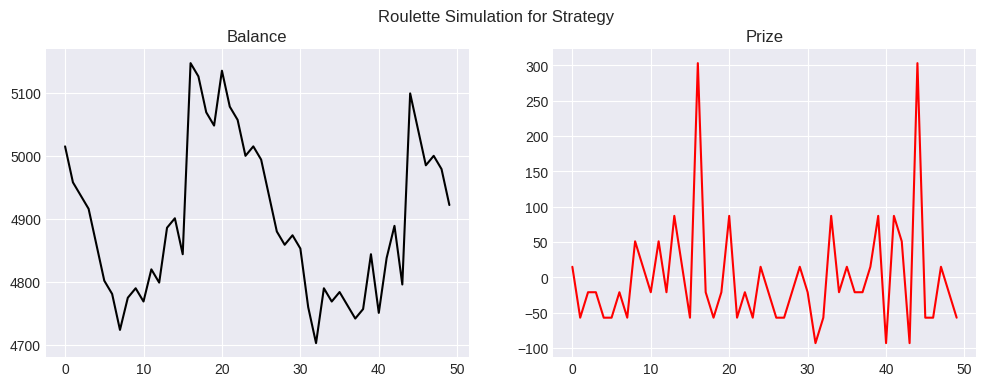

In [332]:
straty2 = MyStrategyV2(target_number=33, initial_balance=5000)
results = simulate(strat=straty2, iterations=50)
simulation_report(results)

========== Summary ==========
Initial balance: 5000
Final balance: 2328
Total earnings: -2672
Total spins: 50
========== Bets Frequencies ==========
ColumnBet: 15 ~ 30.00%
DozenBet: 14 ~ 28.00%
HighLowBet: 26 ~ 52.00%
PairBet: 4 ~ 8.00%
QuadBet: 8 ~ 16.00%
EvenOddBet: 21 ~ 42.00%
RedBlackBet: 29 ~ 58.00%
========== Bets Earnings ==========
ColumnBet: 480
DozenBet: 448
HighLowBet: 416
PairBet: 1088
QuadBet: 1024
EvenOddBet: 336
RedBlackBet: 464
========== Additional ==========
Negative runs: 42 in 50 ~ 84.00%
Average earning per spin: -53.44
Avg bet per spin: 176.00
Max prize: 384, [(33, 16), (3rd, 16), (3rd, 16), (black, 16), (odd, 16), (high, 16), ((33, 32), 16), ((33, 30), 16), ((33, 36), 16), ((29, 30, 32, 33), 16), ((32, 33, 35, 36), 16)], 30
Max loss: -176, [(33, 16), (3rd, 16), (3rd, 16), (black, 16), (odd, 16), (high, 16), ((33, 32), 16), ((33, 30), 16), ((33, 36), 16), ((29, 30, 32, 33), 16), ((32, 33, 35, 36), 16)] 16
Longest negative run: 28 spins, losses: -2896
Longest win s

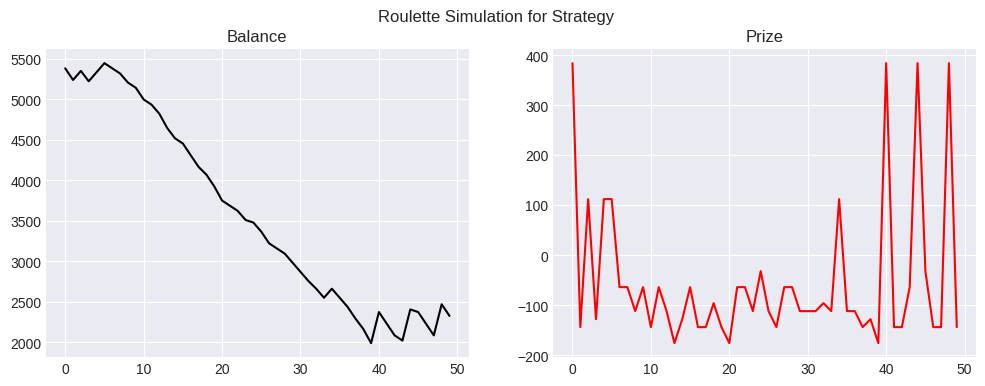

Busted!
========== Summary ==========
Initial balance: 5000
Final balance: -88
Total earnings: -5088
Total spins: 50
========== Bets Frequencies ==========
ColumnBet: 10 ~ 20.00%
DozenBet: 9 ~ 18.00%
HighLowBet: 20 ~ 40.00%
PairBet: 1 ~ 2.00%
QuadBet: 4 ~ 8.00%
EvenOddBet: 14 ~ 28.00%
RedBlackBet: 21 ~ 42.00%
========== Bets Earnings ==========
ColumnBet: 3840
DozenBet: 3456
HighLowBet: 5760
PairBet: 544
QuadBet: 2048
EvenOddBet: 4032
RedBlackBet: 6048
========== Additional ==========
Negative runs: 20 in 50 ~ 40.00%
Average earning per spin: -101.76
Avg bet per spin: 1011.84
Max prize: 1392, [(33, 16), (3rd, 192), (3rd, 192), (black, 288), (odd, 288), (high, 288), ((33, 32), 32), ((33, 30), 32), ((33, 36), 32), ((29, 30, 32, 33), 64), ((32, 33, 35, 36), 64)], 30
Max loss: -1488, [(33, 16), (3rd, 192), (3rd, 192), (black, 288), (odd, 288), (high, 288), ((33, 32), 32), ((33, 30), 32), ((33, 36), 32), ((29, 30, 32, 33), 64), ((32, 33, 35, 36), 64)] 16
Longest negative run: 5 spins, losse

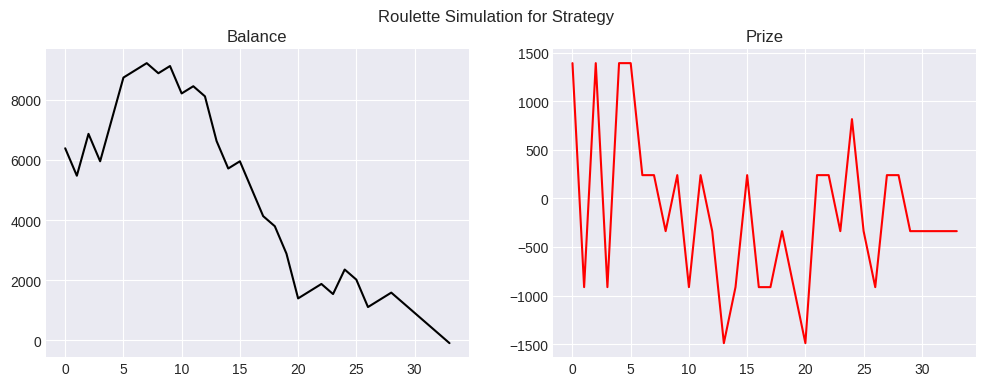

In [333]:
spins = spin_wheel(chunk=50)

straty = MyStrategy(target_number=33, initial_balance=5000, blind=16)
results = simulate(strat=straty, iterations=50, spins=spins)
simulation_report(results)

straty = MyStrategyV2(target_number=33, initial_balance=5000, blind=16)
results = simulate(strat=straty, iterations=50, spins=spins)
simulation_report(results)

In [334]:
class Invincible(BetStrategy):
    def __init__(
        self, target_number: int = None, initial_balance: int = 1000, blind: int = 1
    ) -> None:
        if target_number is None:
            target_number = rng.integers(0, 36, size=1, endpoint=True)
        self.target_number = target_number
        self._balance = initial_balance
        self.blind = blind
        self.prev_balance = initial_balance

    @property
    def balance(self) -> int:
        return self._balance

    @balance.setter
    def balance(self, new_balance: int) -> None:
        """Double the bet if the balance decreased"""
        if self.prev_balance > new_balance:
            self.blind *= 2
        else:
            self.blind = 1
        self._balance = new_balance

    def make_bet(self) -> List[Bet]:
        bets: List[Bet] = [
            SingleBet(self.target_number, self.blind),
            ColumnBet(COLUMNS[self.target_number % 3], self.blind * 12),
            DozenBet(
                DOZENS[int(np.ceil(self.target_number / 12) - 1)], self.blind * 12
            ),
            RedBlackBet(
                "black" if self.target_number in BLACK_NUMBERS else "red",
                self.blind * 18,
            ),
            EvenOddBet("odd" if self.target_number % 2 else "even", self.blind * 18),
            HighLowBet("high" if self.target_number >= 19 else "low", self.blind * 18),
        ]
        bets.extend(
            [PairBet(pair, self.blind * 2) for pair in pairs(self.target_number)]
        )
        bets.extend(
            [QuadBet(quad, self.blind * 4) for quad in quads(self.target_number)]
        )

        return bets

========== Summary ==========
Initial balance: 5000
Final balance: 9563
Total earnings: 4563
Total spins: 50
========== Bets Frequencies ==========
ColumnBet: 15 ~ 30.00%
DozenBet: 14 ~ 28.00%
HighLowBet: 26 ~ 52.00%
PairBet: 4 ~ 8.00%
QuadBet: 8 ~ 16.00%
EvenOddBet: 21 ~ 42.00%
RedBlackBet: 29 ~ 58.00%
========== Bets Earnings ==========
ColumnBet: 1488
DozenBet: 3384
HighLowBet: 3582
PairBet: 136
QuadBet: 256
EvenOddBet: 3816
RedBlackBet: 4824
========== Additional ==========
Negative runs: 30 in 50 ~ 60.00%
Average earning per spin: 91.26
Avg bet per spin: 552.42
Max prize: 6528, [(33, 128), (3rd, 1536), (3rd, 1536), (black, 2304), (odd, 2304), (high, 2304), ((33, 32), 256), ((33, 30), 256), ((33, 36), 256), ((29, 30, 32, 33), 512), ((32, 33, 35, 36), 512)], 31
Max loss: -1344, [(33, 64), (3rd, 768), (3rd, 768), (black, 1152), (odd, 1152), (high, 1152), ((33, 32), 128), ((33, 30), 128), ((33, 36), 128), ((29, 30, 32, 33), 256), ((32, 33, 35, 36), 256)] 17
Longest negative run: 5 spi

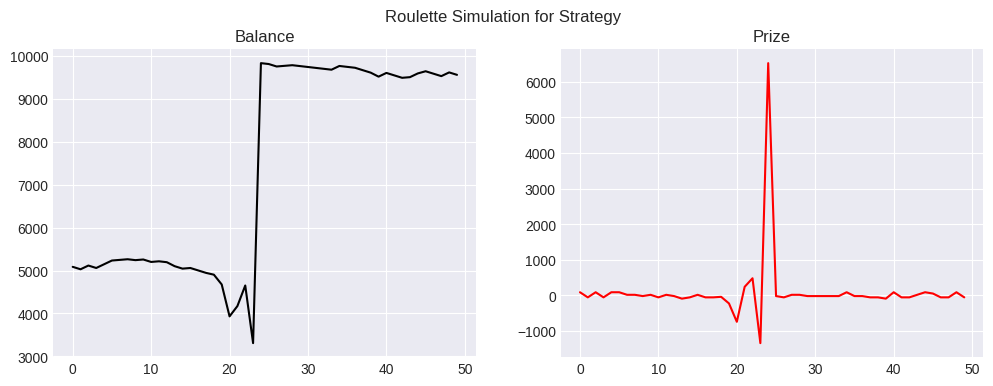

In [335]:
straty3 = Invincible(
    target_number=33, initial_balance=5_000, blind=1
)  # watch out! we need a lot of money

results = simulate(strat=straty3, iterations=50, spins=spins)
simulation_report(results)

In [336]:
class Singles(BetStrategy):
    def __init__(
        self, target_number: int = None, initial_balance: int = 1000, blind: int = 1
    ) -> None:
        if target_number is None:
            target_number = rng.integers(0, 36, size=1, endpoint=True)
        self.target_number = target_number
        self.balance = initial_balance
        self.blind = blind

    def make_bet(self) -> List[Bet]:
        bets: List[Bet] = [
            SingleBet(self.target_number, self.blind),
        ]

        return bets

========== Summary ==========
Initial balance: 5000
Final balance: 4950
Total earnings: -50
Total spins: 50
========== Bets Frequencies ==========
========== Bets Earnings ==========
========== Additional ==========
Negative runs: 50 in 50 ~ 100.00%
Average earning per spin: -1.00
Avg bet per spin: 1.00
Max prize: -1, [(33, 1)], 30
Max loss: -1, [(33, 1)] 30
Longest negative run: 50 spins, losses: -50
Longest win streak: 0 spins, earnings: 0
Zeros:, 1


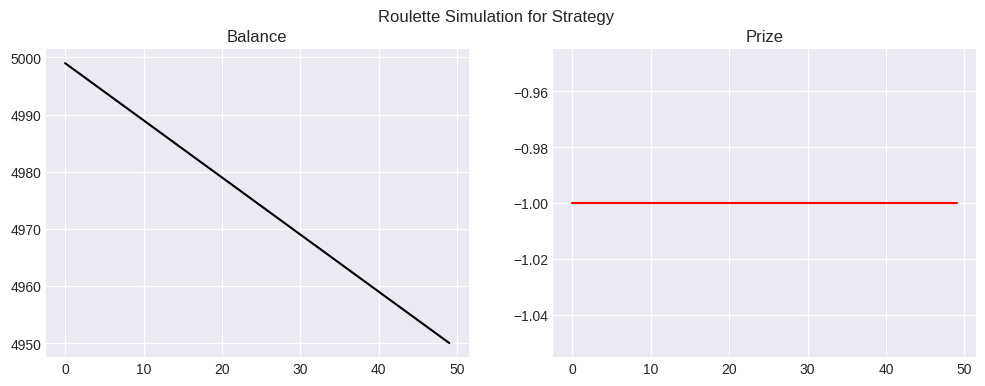

In [337]:
straty4 = Singles(target_number=33, initial_balance=5_000, blind=1)

results = simulate(strat=straty4, iterations=50, spins=spins)
simulation_report(results)